**Enter your code for Exercise 1 in the following cells (add as many cell as you need)**

---



In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('sales_data.csv')
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (50, 8)


In [ ]:
print(df.head(10))

print(df.tail(5))

First 10 rows:
   product_id             product_name     category    price  quantity_sold  \
0           1            Laptop_Pro_15  Electronics  1299.99             45   
1           2           Cotton_T_Shirt     Clothing    29.99            120   
2           3  Python_Programming_Book        Books    49.99             80   
3           4             Coffee_Maker         Home    89.99             95   
4           5           Wireless_Mouse  Electronics    39.99            200   
5           6            Jeans_Classic     Clothing    79.99             75   
6           7    Data_Science_Handbook        Books    59.99             60   
7           8              Blender_Pro         Home   149.99             55   
8           9           Smartphone_X12  Electronics   899.99             30   
9          10             Summer_Dress     Clothing    69.99             85   

   rating  discount_percent        brand  
0     4.5              10.0    TechBrand  
1     4.2              15.0  

In [ ]:
print(df.describe())

print(df.dtypes)

print(df.info())

Summary Statistics:
       product_id        price  quantity_sold     rating  discount_percent
count    50.00000    50.000000       50.00000  50.000000         50.000000
mean     25.50000   152.690000       65.80000   4.358000         14.920000
std      14.57738   221.590287       32.42511   0.261932          6.601917
min       1.00000    29.990000       25.00000   4.000000          5.000000
25%      13.25000    59.990000       41.25000   4.100000         10.000000
50%      25.50000    82.490000       60.00000   4.300000         14.500000
75%      37.75000   137.490000       80.00000   4.600000         20.000000
max      50.00000  1299.990000      200.00000   4.900000         30.000000

Data Types:
product_id            int64
product_name         object
category             object
price               float64
quantity_sold         int64
rating              float64
discount_percent    float64
brand                object
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
R

In [ ]:
filtered_df = df[(df['price'] > 100) & (df['rating'] > 4.0)]

print(f"No. of products with price more than 100 and rating more than 4.0: {len(filtered_df)} products")
print(filtered_df[['product_name', 'price', 'rating', 'category']])

No. of products with price more than 100 and rating more than 4.0: 17 products

Filtered results:
           product_name    price  rating     category
0         Laptop_Pro_15  1299.99     4.5  Electronics
7           Blender_Pro   149.99     4.4         Home
8        Smartphone_X12   899.99     4.6  Electronics
11       Vacuum_Cleaner   199.99     4.2         Home
12      Gaming_Keyboard   129.99     4.7  Electronics
13        Winter_Jacket   159.99     4.3     Clothing
16       Monitor_24inch   299.99     4.4  Electronics
19       Microwave_Oven   179.99     4.1         Home
20           Tablet_Pro   599.99     4.5  Electronics
24  Wireless_Headphones   199.99     4.6  Electronics
27       Food_Processor   129.99     4.2         Home
28          Smart_Watch   349.99     4.4  Electronics
32  External_Hard_Drive   119.99     4.3  Electronics
39          Stand_Mixer   249.99     4.4         Home
41      Blazer_Business   129.99     4.3     Clothing
44  Mechanical_Keyboard   159.99     4

In [5]:
df['total_revenue'] = df['price'] * df['quantity_sold']

df['discounted_price'] = df['price'] * (1 - df['discount_percent']/100)

print(df[['product_name', 'price', 'quantity_sold', 'total_revenue', 'discounted_price']].head())

              product_name    price  quantity_sold  total_revenue  \
0            Laptop_Pro_15  1299.99             45       58499.55   
1           Cotton_T_Shirt    29.99            120        3598.80   
2  Python_Programming_Book    49.99             80        3999.20   
3             Coffee_Maker    89.99             95        8549.05   
4           Wireless_Mouse    39.99            200        7998.00   

   discounted_price  
0         1169.9910  
1           25.4915  
2           47.4905  
3           71.9920  
4           35.1912  


In [6]:
stats = df.groupby('category').agg({
    'price': ['mean', 'median'],
    'total_revenue': ['mean', 'median'],
    'rating': ['mean', 'count']
}).round(2)

print(stats)

brand_stats = df.groupby('brand').agg({
    'price': 'mean',
    'total_revenue': 'sum'
}).round(2)
print(brand_stats)

              price         total_revenue          rating      
               mean  median          mean   median   mean count
category                                                       
Books         63.74   62.49       3493.18  3586.88   4.68    12
Clothing      76.91   69.99       5254.98  5099.15   4.13    13
Electronics  330.76  159.99      14326.23  8449.35   4.45    13
Home         130.82  124.99       6586.92  6324.48   4.18    12
              price  total_revenue
brand                             
EduPublish    63.74       41918.15
FashionCorp   76.91       68314.80
HomePlus     130.82       79043.10
TechBrand    330.76      186241.05


In [7]:
df_sorted = df.sort_values('total_revenue', ascending=False)

print(df_sorted[['product_name', 'category', 'total_revenue']].head(10))

df_multi_sort = df.sort_values(['category', 'rating'], ascending=[True, False])

print(df_multi_sort[['product_name', 'category', 'rating']].head(10))

           product_name     category  total_revenue
0         Laptop_Pro_15  Electronics       58499.55
8        Smartphone_X12  Electronics       26999.70
20           Tablet_Pro  Electronics       23999.60
24  Wireless_Headphones  Electronics       10999.45
28          Smart_Watch  Electronics       10499.70
32  External_Hard_Drive  Electronics        8999.25
17       Sneakers_Sport     Clothing        8999.10
3          Coffee_Maker         Home        8549.05
12      Gaming_Keyboard  Electronics        8449.35
15            Air_Fryer         Home        8399.30
               product_name category  rating
14      AI_Machine_Learning    Books     4.9
2   Python_Programming_Book    Books     4.8
22         Database_Systems    Books     4.8
34          Cloud_Computing    Books     4.8
6     Data_Science_Handbook    Books     4.7
26          Algorithms_Book    Books     4.7
38           Mobile_App_Dev    Books     4.7
18     Web_Development_Book    Books     4.6
30         Network_Secu

In [ ]:
print("Missing values in the dataset:")
print(df.isnull().sum())

df_cleaned = df.copy()

print("After handling missing values:")
print(df_cleaned.isnull().sum())

print("Dataset is clean, no missing values found!")

Missing values in the dataset:
product_id          0
product_name        0
category            0
price               0
quantity_sold       0
rating              0
discount_percent    0
brand               0
total_revenue       0
discounted_price    0
dtype: int64
After handling missing values:
product_id          0
product_name        0
category            0
price               0
quantity_sold       0
rating              0
discount_percent    0
brand               0
total_revenue       0
discounted_price    0
dtype: int64
Dataset is clean - no missing values found!


In [9]:
df.to_csv('processed_sales_data.csv', index=False)

**Enter your code for Exercise 2 in the following cells (add as many cell as you need)**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

df = pd.read_csv('student_data.csv')
print(df.shape)
print(df.head())

(50, 14)
   student_id           name  age  gender             major  semester  \
0           1  Alice_Johnson   20  Female  Computer_Science         6   
1           2      Bob_Smith   21    Male       Engineering         4   
2           3    Carol_Brown   19  Female       Mathematics         2   
3           4   David_Wilson   22    Male           Physics         8   
4           5     Emma_Davis   20  Female           Biology         6   

   math_score  science_score  english_score  gpa  study_hours_per_week  \
0          85             88             82  3.5                    25   
1          78             92             75  3.2                    20   
2          95             90             88  3.8                    30   
3          82             95             79  3.4                    22   
4          88             85             92  3.6                    28   

   attendance_percent extracurricular scholarship  
0                  92             Yes         Yes  
1  

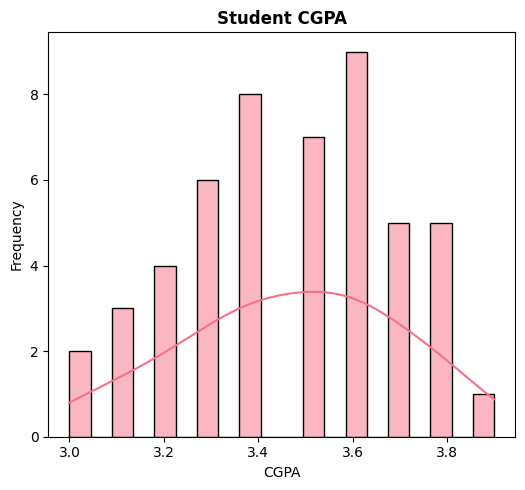

In [30]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='gpa', kde=True, bins=20)
plt.title('Student CGPA', fontweight='bold')
plt.xlabel('CGPA')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

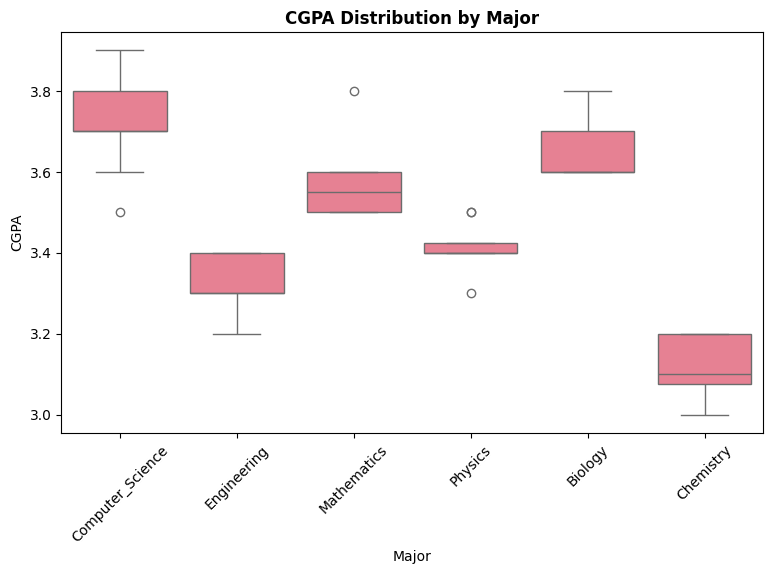

In [31]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='major', y='gpa')
plt.title('CGPA Distribution by Major', fontweight='bold')
plt.xlabel('Major')
plt.ylabel('CGPA')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

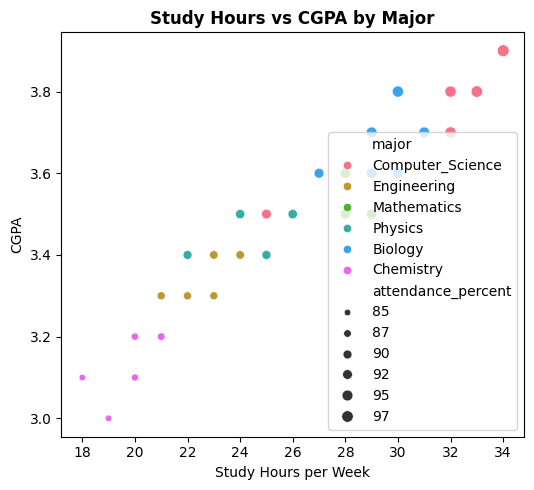

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='study_hours_per_week', y='gpa', hue='major', size='attendance_percent')
plt.title('Study Hours vs CGPA by Major', fontweight='bold')
plt.xlabel('Study Hours per Week')
plt.ylabel('CGPA')

plt.tight_layout()
plt.show()

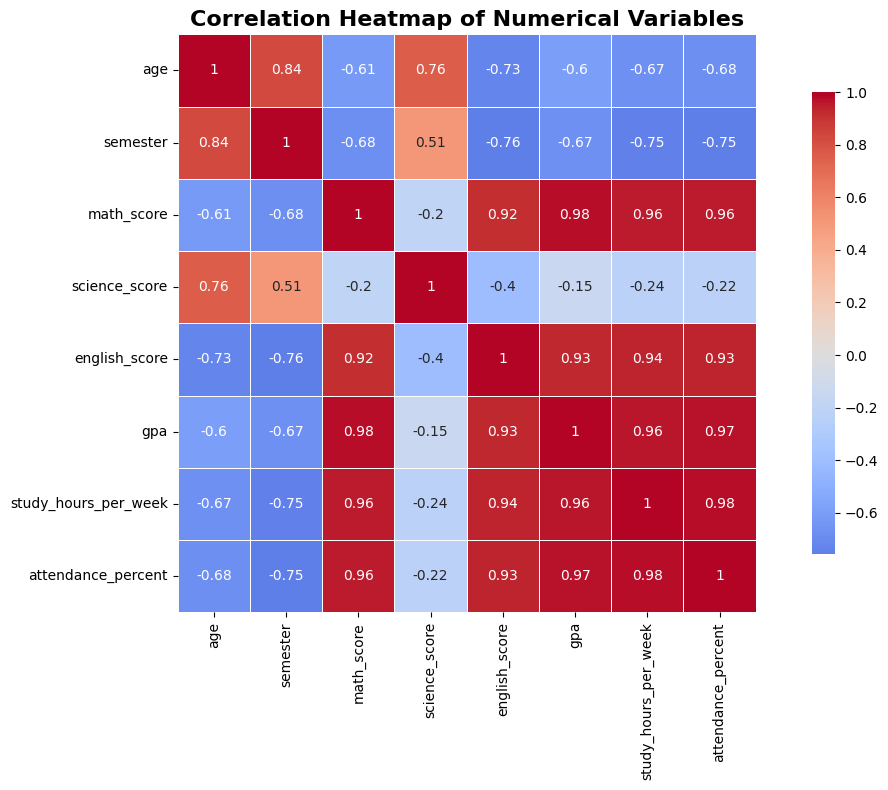

In [ ]:
plt.figure(figsize=(12, 8))

numerical_cols = ['age', 'semester', 'math_score', 'science_score', 'english_score', 'gpa', 'study_hours_per_week', 'attendance_percent']
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix,
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

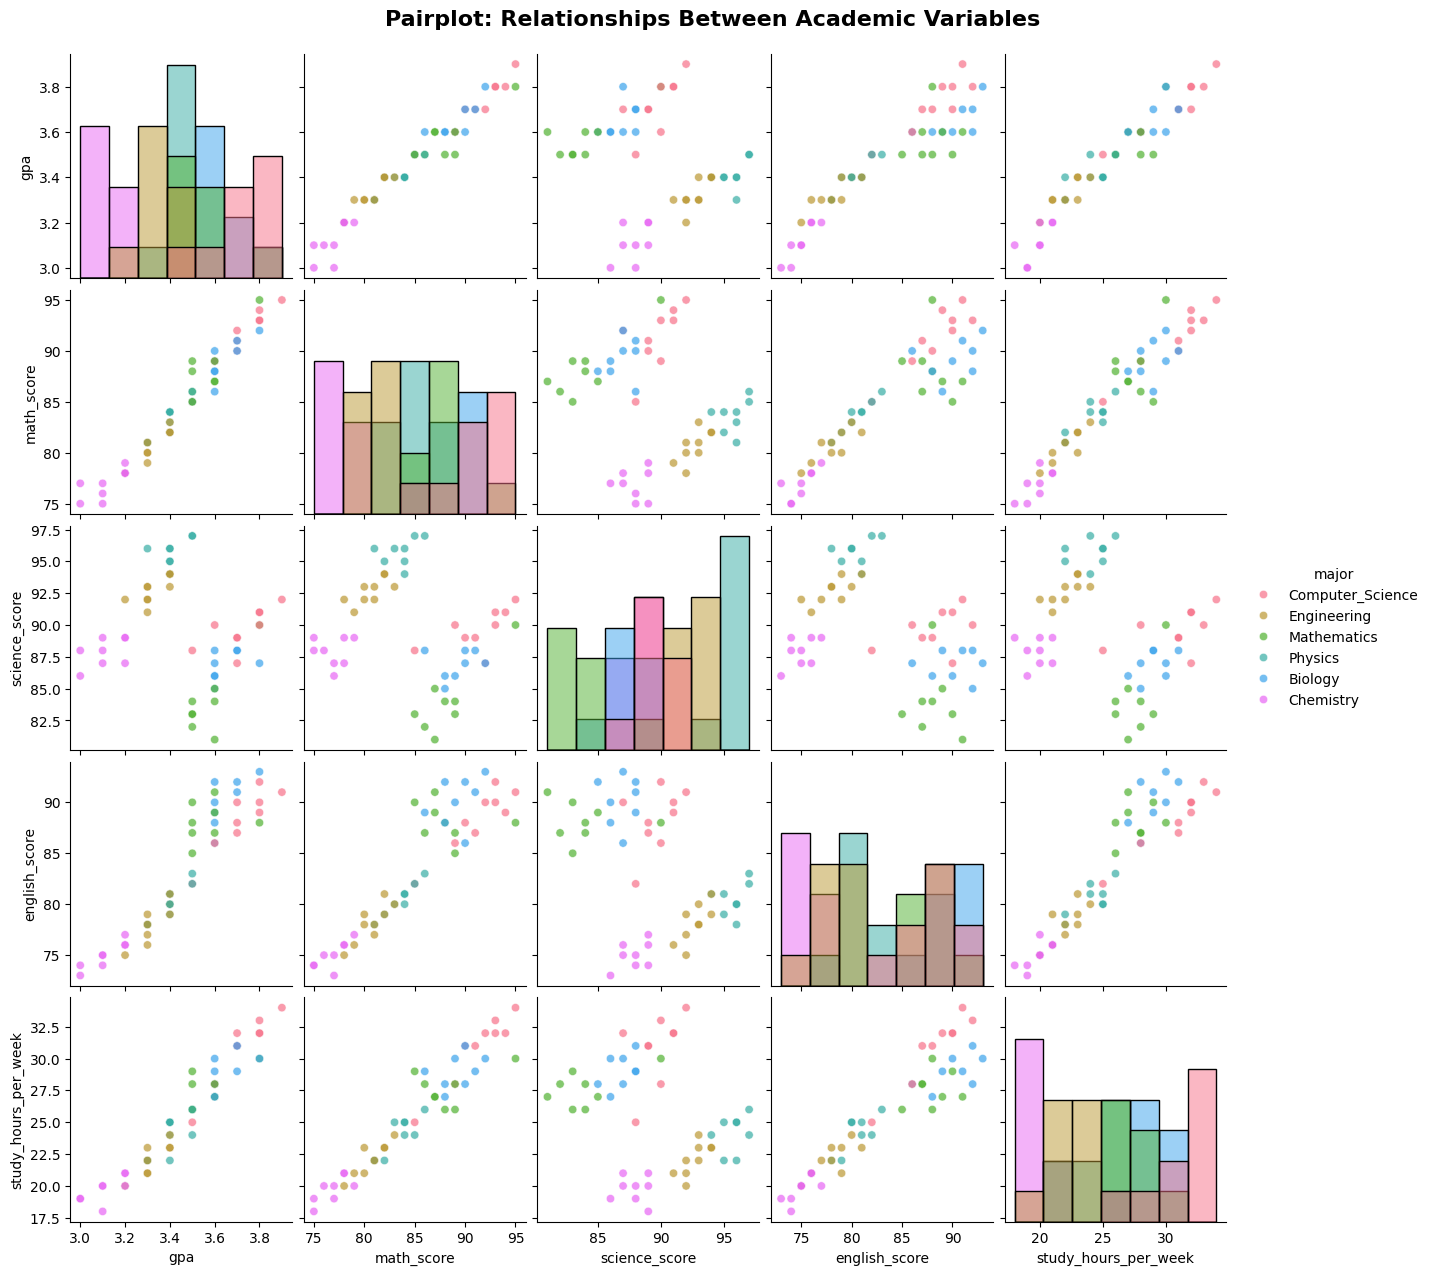

In [ ]:
selected_vars = ['gpa', 'math_score', 'science_score', 'english_score', 'study_hours_per_week']
pairplot_data = df[selected_vars + ['major']]

pairplot = sns.pairplot(pairplot_data, 
                       hue='major', 
                       diag_kind='hist',
                       plot_kws={'alpha': 0.7})

pairplot.fig.suptitle('Pairplot: Relationships Between Academic Variables',
                     y=1.02, fontsize=16, fontweight='bold')

plt.show()